# Deep Learning Assignment 4

## Akshay R - A20442409

### Question 1

In [361]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

### Question a, b:

In [2]:
#train test validation and normalization
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
'train_dir',
target_size = (150,150),
batch_size = 20,
class_mode = "binary")
validation_generator = train_datagen.flow_from_directory(
'validation_dir',
target_size = (150,150),
batch_size = 20,
class_mode = "binary")
test_generator = test_datagen.flow_from_directory(
'test_dir',
target_size = (150,150),
batch_size = 20,
class_mode = "binary")

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Question c:

In [3]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16

In [4]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())

model1.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.50))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.50))
model1.add(layers.Dense(1,activation = 'sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)      

In [5]:
from keras import optimizers
model1.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-4),
    metrics = ['acc'])

In [6]:
history = model1.fit_generator(
    train_generator,
    steps_per_epoch = 128,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 32)
model1.save("Basic_cats_and_dogs.h5")

Epoch 1/30
128/128 [==============================] - 49s 381ms/step - loss: 0.9268 - acc: 0.5992 - val_loss: 2.1510 - val_acc: 0.5000
Epoch 2/30
128/128 [==============================] - 48s 376ms/step - loss: 0.7462 - acc: 0.6711 - val_loss: 2.2080 - val_acc: 0.5000
Epoch 3/30
128/128 [==============================] - 48s 375ms/step - loss: 0.6113 - acc: 0.7285 - val_loss: 1.1740 - val_acc: 0.5047
Epoch 4/30
128/128 [==============================] - 47s 371ms/step - loss: 0.5565 - acc: 0.7574 - val_loss: 1.0281 - val_acc: 0.6031
Epoch 5/30
128/128 [==============================] - 48s 376ms/step - loss: 0.4883 - acc: 0.7848 - val_loss: 0.8192 - val_acc: 0.6938
Epoch 6/30
128/128 [==============================] - 49s 382ms/step - loss: 0.4065 - acc: 0.8199 - val_loss: 0.4349 - val_acc: 0.7484
Epoch 7/30
128/128 [==============================] - 48s 377ms/step - loss: 0.3953 - acc: 0.8348 - val_loss: 0.3813 - val_acc: 0.7672
Epoch 8/30
128/128 [==============================] - 4

### Question d:

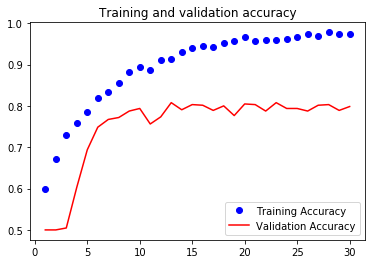

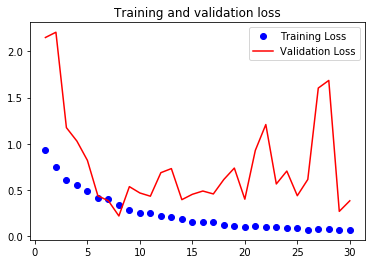

In [8]:
#model1 results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Question e:

Image tensor shape: (1, 150, 150, 3)


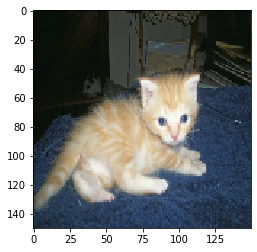

First layer activation shape: (1, 148, 148, 32)


/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`


In [348]:
from keras.models import load_model
from keras import models
from keras.preprocessing import image
import numpy as np

img_path = '/Users/akshayrajeev/Documents/Deep Learning/cd_data/test_dir/cats/1999.jpg'
img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.
print("Image tensor shape:",img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

loaded_model = load_model("Basic_cats_and_dogs.h5")
layer_outputs = [layer.output for layer in loaded_model.layers[:8]]
activation_model = models.Model(inputs = loaded_model.input, output = layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print("First layer activation shape:", first_layer_activation.shape)

# for i in range(0,32):
#     print(first_layer_activation[0, :, :, i].shape)
# #     plt.matshow(first_layer_activation[0, :, :, i], cmap = 'viridis')
# # plt.matshow(first_layer_activation[0, :, :, 7], cmap = 'viridis')

Conv2d_1:


/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  


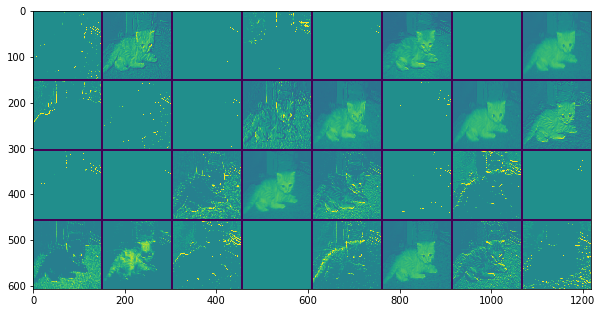

Conv2d_2:


/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`


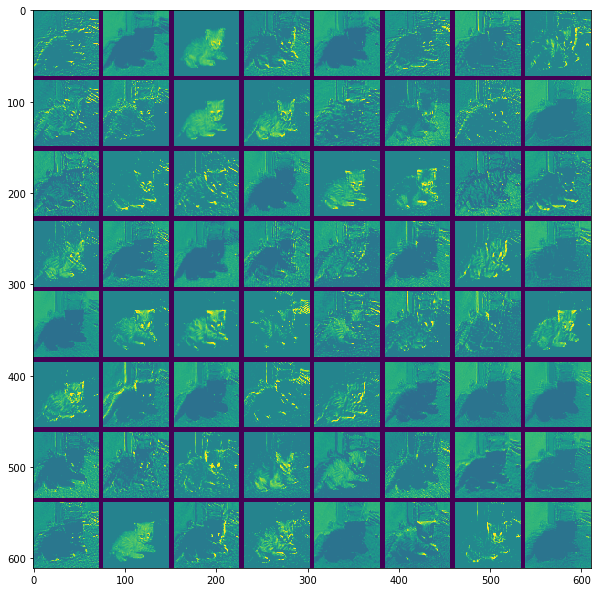

Conv2d_3:


/Users/akshayrajeev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`


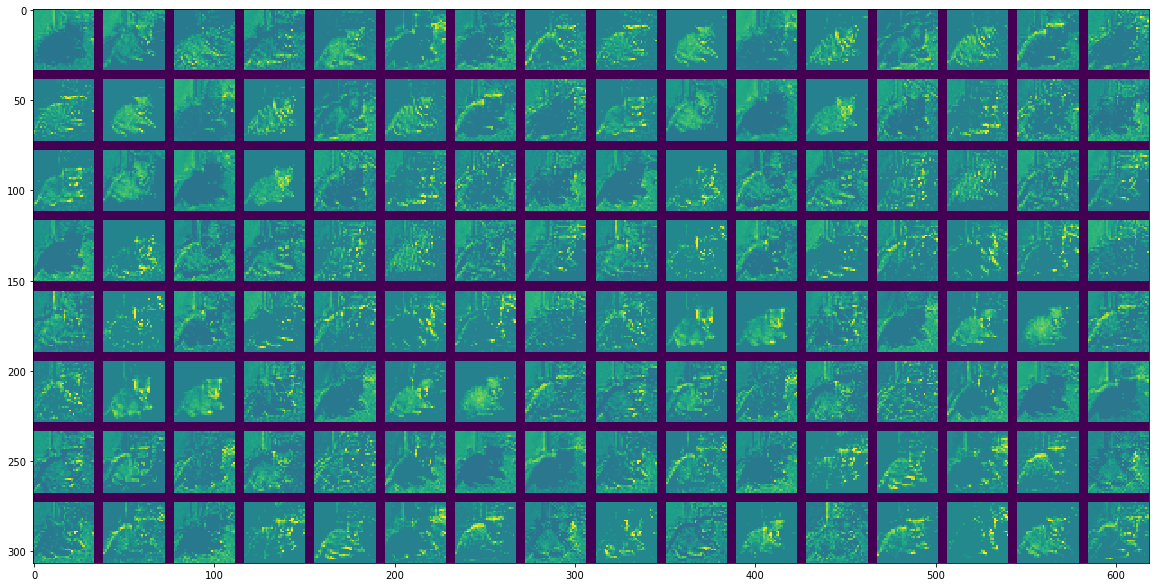

In [360]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_conv2d_1_patterns(layer_name, size):
    layer_name = 'conv2d_1'
    layer_output = loaded_model.get_layer(layer_name).output
    activation_model = models.Model(inputs = loaded_model.input, output = layer_output)
    activations = activation_model.predict(img_tensor)
    filter_image_index = activations
    act_results = np.zeros((4*size + 3*margin, 8*size + 7*margin), dtype = np.uint8)
    for i in range(8):
        for j in range(4):
            filter_img = filter_image_index[0, :, :, i+(j*8)]
            filter_img = deprocess_image(filter_img)
            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            act_results[vertical_start: vertical_end, horizontal_start: horizontal_end] = filter_img
    return act_results

def generate_conv2d_2_patterns(layer_name, size):
    layer_name = 'conv2d_2'
    layer_output = loaded_model.get_layer(layer_name).output
    activation_model = models.Model(inputs = loaded_model.input, output = layer_output)
    activations = activation_model.predict(img_tensor)
    filter_image_index = activations
    act_results = np.zeros((8*size + 7*margin, 8*size + 7*margin), dtype = np.uint8)
    for i in range(8):
        for j in range(8):
            filter_img = filter_image_index[0, :, :, i+(j*8)]
            filter_img = deprocess_image(filter_img)
            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            act_results[vertical_start: vertical_end, horizontal_start: horizontal_end] = filter_img
    return act_results

def generate_conv2d_3_patterns(layer_name, size):
    layer_name = 'conv2d_3'
    layer_output = loaded_model.get_layer(layer_name).output
    activation_model = models.Model(inputs = loaded_model.input, output = layer_output)
    activations = activation_model.predict(img_tensor)
    filter_image_index = activations
    act_results = np.zeros((8*size + 7*margin, 16*size + 15*margin), dtype = np.uint8)
    for i in range(16):
        for j in range(8):
            filter_img = filter_image_index[0, :, :, i+(j*8)]
            filter_img = deprocess_image(filter_img)
            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            act_results[vertical_start: vertical_end, horizontal_start: horizontal_end] = filter_img
    return act_results
    
plt.figure(figsize = (10,10))
print("Conv2d_1:")
plt.imshow(generate_conv2d_1_patterns('conv2d_1',148), cmap = 'viridis')
plt.show()
plt.figure(figsize = (10,20))
print("Conv2d_2:")
plt.imshow(generate_conv2d_2_patterns('conv2d_2',72), cmap = 'viridis')
plt.show()
plt.figure(figsize = (20,40))
print("Conv2d_3:")
plt.imshow(generate_conv2d_3_patterns('conv2d_3',34), cmap = 'viridis')
plt.show()


In [357]:
# layer_names = ['conv2d_1','conv2d_2']
# # for layer in loaded_model.layers[:8]:   ,'conv2d_2','conv2d_3 
# #     layer_names.append(layer.name)
# # print(layer_names)

# layer_output2 = loaded_model.get_layer(layer_names).output
# activation_model2 = models.Model(inputs = loaded_model.input, output = layer_output2)
# activations2 = activation_model2.predict(img_tensor)
# filter_image_index2= activations2
# print(filter_image_index2.shape)

# images_per_row = 16
# for layer_name, layer_activation in zip(layer_names, activations):
#     print(layer_name,":", layer_activation.shape )
#     n_features = layer_activation.shape[-1]
#     print("Channels in the current layer:", n_features)
#     size = layer_activation.shape[1]
#     print("Image size in the current layer:", size)
#     n_cols = n_features // images_per_row
#     print("Rows in image grid:", n_cols)
#     display_grid = np.zeros((size * n_cols, images_per_row * size))
#     print("Display grid shape:",display_grid.shape)
#     for col in range(n_cols):
#         for row in range(images_per_row):
#             channel_image = layer_activation[0, :, :, col * images_per_row + row]
#             channel_image -= channel_image.mean()
#             channel_image /= channel_image.std()
#             channel_image *= 64
#             channel_image += 128
#             channel_image = np.clip(channel_image, 0, 255).astype('uint8')
# #             print("Channel",col * images_per_row + row,channel_image.shape)
# #             print(channel_image.shape)
# #             print(display_grid[col*size : (col + 1)*size, row*size: (row + 1)*size].shape)
#             display_grid[col*size : (col + 1)*size, row*size: (row + 1)*size] = chanel_image

# scale = 1./size
# plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
# plt.title(layer_name)
# plt.grid(False)
# plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

### Question f:

In [358]:
from keras import backend as K

loaded_model = load_model("Basic_cats_and_dogs.h5")

def generate_pattern(layer_name, filter_index, size = 150):
    layer_output = loaded_model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, loaded_model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([loaded_model.input], [loss, grads])
#     loss_value, grads_value = iterate([np.zeros((1,150,150,3))])
    input_img_data = np.random.random((1,150,150,3)) * 20 + 128
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step 
    img = input_img_data[0]
    return deprocess_image(img)
# for filteri in range(32):
#     print(filteri)
#     plt.imshow(generate_pattern('conv2d_2', filteri, 150))
#     plt.show()


Results.shape:  (615, 1235, 3)


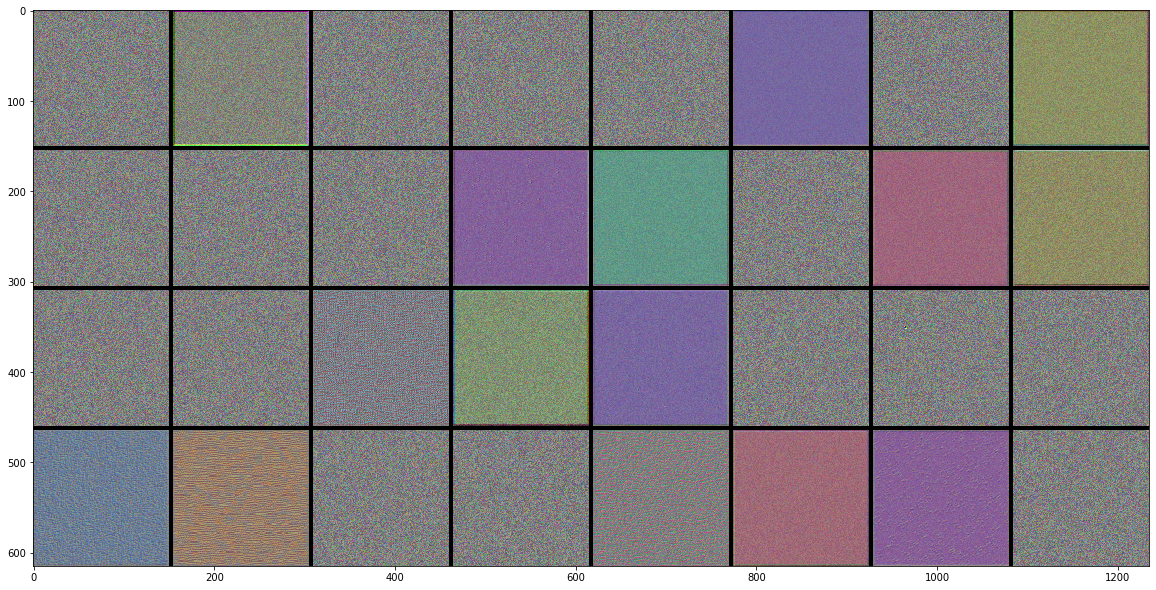

In [309]:
layer_name = 'conv2d_1'
size = 150
margin =5

results = np.zeros((4*size + 3*margin, 8*size + 7*margin, 3), dtype = np.uint8)
print("Results.shape: ", results.shape)
for i in range(8):
    for j in range(4):
        filter_image = generate_pattern(layer_name, i + (j*8), size = size)
        horizontal_start = i*size + i*margin
        horizontal_end = horizontal_start + size
        vertical_start = j*size + j*margin
        vertical_end = vertical_start + size
        results[vertical_start: vertical_end, horizontal_start: horizontal_end, :] = filter_image

plt.figure(figsize = (20,20))
plt.imshow(results)

Results.shape:  (1235, 1235, 3)


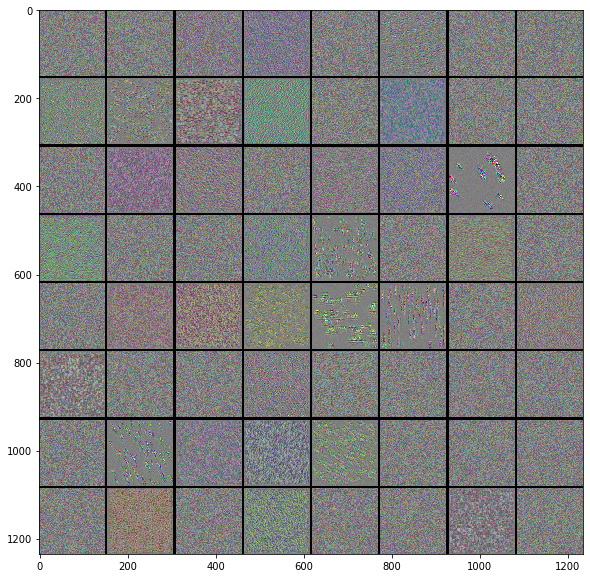

In [311]:
layer_name = 'conv2d_2'
size = 150
margin =5

results = np.zeros((8*size + 7*margin, 8*size + 7*margin, 3), dtype = np.uint8)
print("Results.shape: ", results.shape)
for i in range(8):
    for j in range(8):
        filter_image = generate_pattern(layer_name, i + (j*8), size = size)
        horizontal_start = i*size + i*margin
        horizontal_end = horizontal_start + size
        vertical_start = j*size + j*margin
        vertical_end = vertical_start + size
        results[vertical_start: vertical_end, horizontal_start: horizontal_end, :] = filter_image

plt.figure(figsize = (10,10))
plt.imshow(results)

In [318]:
layer_name = 'conv2d_3'
size = 150
margin =5

results = np.zeros((8*size + 7*margin, 16*size + 15*margin, 3), dtype = np.uint8)
print("Results.shape: ", results.shape)
for i in range(16):
    for j in range(8):
        filter_image = generate_pattern(layer_name, i + (j*8), size = size)
        horizontal_start = i*size + i*margin
        horizontal_end = horizontal_start + size
        vertical_start = j*size + j*margin
        vertical_end = vertical_start + size
        results[vertical_start: vertical_end, horizontal_start: horizontal_end, :] = filter_image

Results.shape:  (1235, 2475, 3)


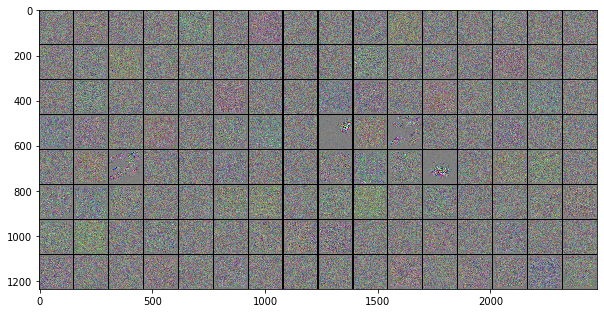

In [319]:
plt.figure(figsize = (10,20))
plt.imshow(results)

### Question g:

In [8]:
#VGG16 with frozen weights
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3))
conv_base.summary()
conv_base.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(Dropout(0.5))
model2.add(layers.Dense(356, activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 356)               2916708   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 357       
Total params: 17,631,753
Trainable params: 2,917,065
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from keras import optimizers
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-4),
    metrics = ['acc'])

In [11]:
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 128,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 32)

Epoch 1/30
128/128 [==============================] - 109s 852ms/step - loss: 0.4226 - acc: 0.7965 - val_loss: 0.4277 - val_acc: 0.8766
Epoch 2/30
128/128 [==============================] - 112s 876ms/step - loss: 0.2862 - acc: 0.8758 - val_loss: 0.2219 - val_acc: 0.8578
Epoch 3/30
128/128 [==============================] - 113s 882ms/step - loss: 0.2389 - acc: 0.8984 - val_loss: 0.1147 - val_acc: 0.8859
Epoch 4/30
128/128 [==============================] - 113s 884ms/step - loss: 0.2172 - acc: 0.9109 - val_loss: 0.1592 - val_acc: 0.8672
Epoch 5/30
128/128 [==============================] - 113s 887ms/step - loss: 0.1974 - acc: 0.9184 - val_loss: 0.0908 - val_acc: 0.8750
Epoch 6/30
128/128 [==============================] - 114s 887ms/step - loss: 0.1772 - acc: 0.9250 - val_loss: 0.2338 - val_acc: 0.8766
Epoch 7/30
128/128 [==============================] - 114s 889ms/step - loss: 0.1638 - acc: 0.9273 - val_loss: 0.1989 - val_acc: 0.8734
Epoch 8/30
128/128 [============================

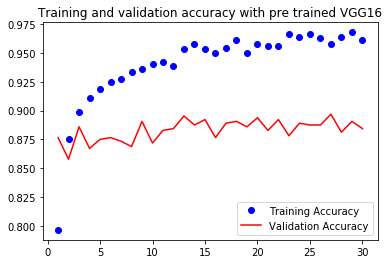

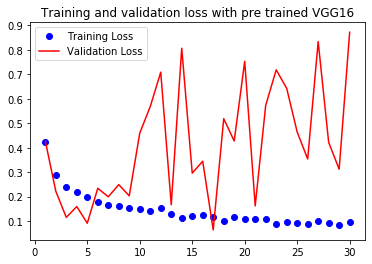

In [12]:
#model2 results
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy with pre trained VGG16')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss with pre trained VGG16')
plt.legend()
plt.show()

### Question h:

In [13]:
#unfreezing the weights 
conv_base.trainable = True
set_trainable = False
for layers in conv_base.layers:
    if layers.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layers.trainable = True
    else:
        layers.trainable = False

model2.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-4),
    metrics = ['acc'])
        
history3 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 128,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 32)

Epoch 1/30
128/128 [==============================] - 140s 1s/step - loss: 0.5570 - acc: 0.8469 - val_loss: 0.2683 - val_acc: 0.8281
Epoch 2/30
128/128 [==============================] - 144s 1s/step - loss: 0.2117 - acc: 0.9230 - val_loss: 0.0988 - val_acc: 0.9109
Epoch 3/30
128/128 [==============================] - 138s 1s/step - loss: 0.1480 - acc: 0.9484 - val_loss: 0.3524 - val_acc: 0.9219
Epoch 4/30
128/128 [==============================] - 138s 1s/step - loss: 0.1120 - acc: 0.9629 - val_loss: 0.5013 - val_acc: 0.8547
Epoch 5/30
128/128 [==============================] - 137s 1s/step - loss: 0.0845 - acc: 0.9758 - val_loss: 0.4300 - val_acc: 0.9078
Epoch 6/30
128/128 [==============================] - 138s 1s/step - loss: 0.0941 - acc: 0.9746 - val_loss: 0.7570 - val_acc: 0.9156
Epoch 7/30
128/128 [==============================] - 137s 1s/step - loss: 0.0859 - acc: 0.9840 - val_loss: 0.0500 - val_acc: 0.9156
Epoch 8/30
128/128 [==============================] - 137s 1s/step - 

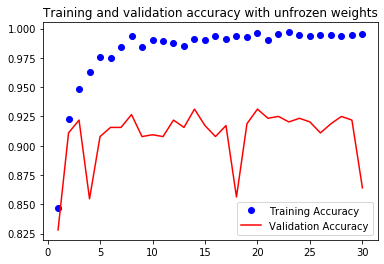

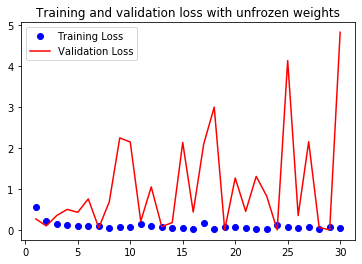

In [14]:
#model2 results with unfreefing
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy with unfrozen weights')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss with unfrozen weights')
plt.legend()
plt.show()

### Question i:

In [15]:
#data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

#create augmeted tensors 
train_generator = train_datagen.flow_from_directory(
'train_dir',
target_size = (150,150),
batch_size = 20,
class_mode = "binary")

val_generator = val_datagen.flow_from_directory(
'validation_dir',
target_size = (150,150),
batch_size = 20,
class_mode = "binary")

test_generator = test_datagen.flow_from_directory(
'test_dir',
target_size = (150,150),
batch_size = 20,
class_mode = "binary")

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [16]:
#VGG16 with frozen weights
conv_base.trainable = False
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.RMSprop(lr = 1e-4),
    metrics = ['acc'])

history4 = model2.fit_generator(
    train_generator,
    steps_per_epoch = 128,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 32)

Epoch 1/30
128/128 [==============================] - 122s 952ms/step - loss: 1.7200 - acc: 0.8359 - val_loss: 0.1025 - val_acc: 0.9109
Epoch 2/30
128/128 [==============================] - 121s 943ms/step - loss: 0.4263 - acc: 0.8453 - val_loss: 0.1508 - val_acc: 0.9234
Epoch 3/30
128/128 [==============================] - 120s 937ms/step - loss: 0.3895 - acc: 0.8562 - val_loss: 0.2416 - val_acc: 0.9219
Epoch 4/30
128/128 [==============================] - 121s 943ms/step - loss: 0.3756 - acc: 0.8715 - val_loss: 0.2525 - val_acc: 0.9297
Epoch 5/30
128/128 [==============================] - 121s 945ms/step - loss: 0.3436 - acc: 0.8648 - val_loss: 0.0851 - val_acc: 0.9266
Epoch 6/30
128/128 [==============================] - 121s 942ms/step - loss: 0.3246 - acc: 0.8891 - val_loss: 0.1944 - val_acc: 0.9094
Epoch 7/30
128/128 [==============================] - 128s 998ms/step - loss: 0.2961 - acc: 0.8820 - val_loss: 0.2485 - val_acc: 0.9109
Epoch 8/30
128/128 [============================

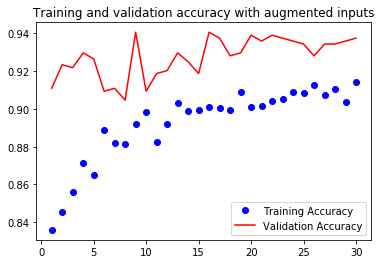

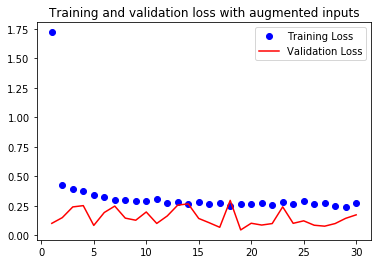

In [17]:
#model3 results with data agumented train images
import matplotlib.pyplot as plt
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and validation accuracy with augmented inputs')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation loss with augmented inputs')
plt.legend()
plt.show()